## In の固液相転移

DSC のデータは測定装置の都合上符号が逆になっている。

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [10]:
def SimpsonIntegral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx/3 * (y[start_index] + 2*np.sum(y[start_index:time_index:2]) + 4*np.sum(y[start_index+1:time_index:2]) + y[time_index])
        res = np.append(res, integrated_value)
    return res

def MidpointIntefral(x, y, start_index = 0, end_index = 3899):
    dx    = x[1]-x[0]
    res = np.array([])
    for time_index in range(start_index, end_index):
        integrated_value = dx * np.sum(y[start_index:time_index])
        res = np.append(res, integrated_value)
    return res

def calcDelta(Time, Delta, start_index, end_index):

    res1=np.polyfit(np.concatenate([Time[start_index-100:start_index], Time[end_index:end_index+100]]),
                    np.concatenate([Delta[start_index-100:start_index], Delta[end_index:end_index+100]]), 1)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.set_xlim(Time[start_index-20],Time[end_index+20])
    ax1.set_ylim(np.min(Delta[start_index:end_index]),np.max(Delta[start_index:end_index]))
    ax1.set_xlabel("Time (sec)")
    ax1.set_ylabel("Delta")

    ax1.plot(Time, Delta, c="tab:orange")
    ax1.plot(Time, res1[0]*Time+res1[1], c="tab:red")

    Integral_val = MidpointIntefral(Time, Delta-(res1[0]*Time+res1[1]), start_index, end_index)

    ax2 = ax1.twinx()
    # ax2.set_ylim(np.min(Integral_val),np.max(Integral_val))
    ax2.set_ylabel("Integral")
    ax2.plot(Time[start_index:end_index], Integral_val, c = "tab:blue")
    # ax1.set_title("$Integral \Delta =$  {:d}".format(int(Integral_val[-1])))
    plt.show()
    return Integral_val[-1]

測定データのインポート

In [11]:
df = pd.read_csv("2024_11_08/In.csv",
                encoding = 'shift_jis',
                skiprows = 30,
                usecols  = [0, 1, 2])

                                                                     # 単位
Time = df.iloc[:,0].to_numpy() * 60                                  # sec
Temp = df.iloc[:,1].to_numpy() + 273.15                              # K
Dsc  =-df.iloc[:,2].to_numpy() * 10**(-6)                            # W

del df

In [12]:
Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) * 1000  # J/g・K
mol  = 0.001 / 114.818
dHdt = Dsc / mol
dSdt = dHdt / Temp

C:\Users\xiang\AppData\Local\Temp\ipykernel_28804\2640943616.py:1: RuntimeWarning: divide by zero encountered in divide
  Cp   = Dsc[1:] * (Time[1:] - Time[:-1])/(Temp[1:]-Temp[:-1]) * 1000  # J/g・K


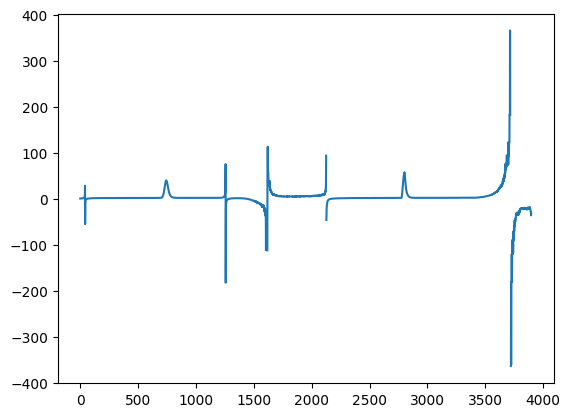

In [13]:
plt.plot(Cp)

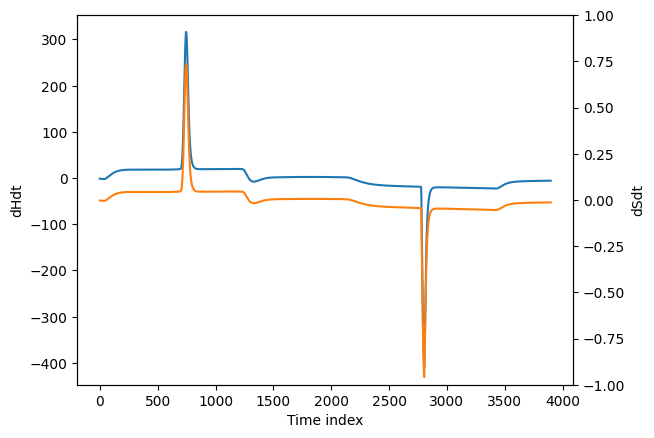

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Time index")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
ax2.set_ylim(-1, 1)
ax1.plot(dHdt)
ax2.plot(dSdt, c = "tab:orange")

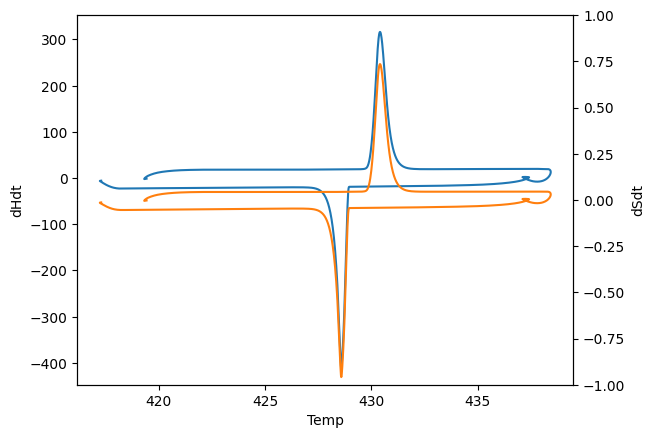

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel("Temp")
ax2 = ax1.twinx()
ax1.set_ylabel("dHdt")
ax2.set_ylabel("dSdt")
ax2.set_ylim(-1, 1)
ax1.plot(Temp, dHdt)
ax2.plot(Temp, dSdt, c = "tab:orange")

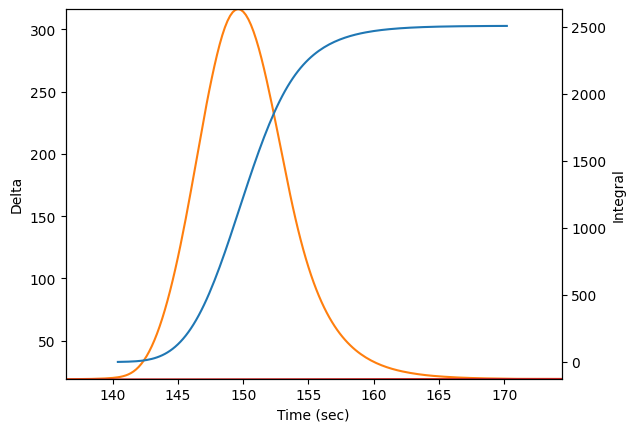

2504.831615216735


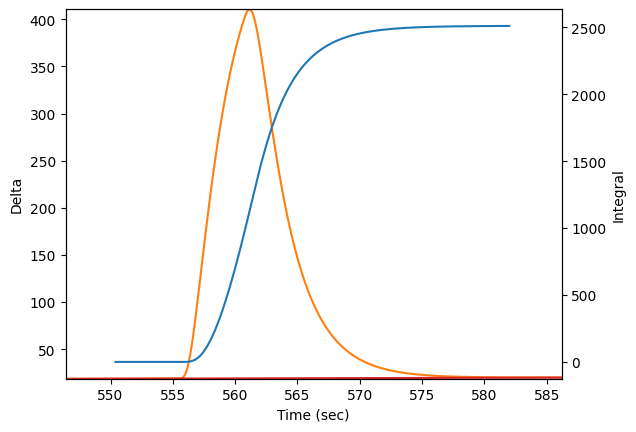

2510.3967696420073


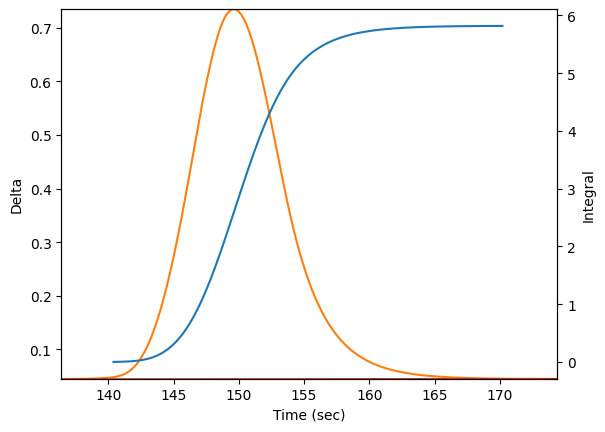

5.8189742129910655


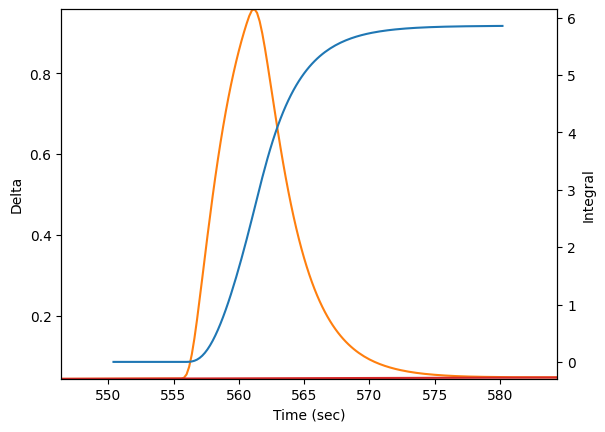

5.854246437398196


In [16]:
print(calcDelta(Time, dHdt, 700, 850))
print(calcDelta(Time, -dHdt, 2750, 2909))
print(calcDelta(Time, dSdt, 700, 850))
print(calcDelta(Time, -dSdt, 2750, 2900))